In [1]:
# boiler plate
from collections import Counter
import pickle
from importlib import reload
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


import ipdb
import mytf.utils as mu

tf.enable_eager_execution()

print(tf.executing_eagerly())



True


In [2]:
with open('models/2019-05-19T001217-UTC-outdata--SUBSET.pkl', 'rb') as fd:
    minidata = pickle.load(fd)
    

In [4]:
reload(mu)
#Hand-tuned ... 
# Previous weights:
# class_weights = {0: 0.1, 1: 0.5, 2: 0.1, 3: 0.3}

# New weights:
class_weights = {0: 1.0, 1: 1.3, 2: 1.0, 3: 0.55}
training_indices = np.arange(0, minidata['x_train'].shape[0], 1)[:47000]
print('training indices...', training_indices.shape)

dataset_batches = mu.build_dataset_weighty_v3(minidata, training_indices, class_weights,
        batch_size=1000)


training indices... (47000,)
Start build v3: .. doesnt add up to 1.0
num slices 47
size_remainder,  0
Counter({3: 435, 2: 215, 0: 193, 1: 157})
weights_per_class,  tf.Tensor([0.00518135 0.00828025 0.00465116 0.00126437], shape=(4,), dtype=float32)
851.3499999999923
Counter({3: 422, 0: 230, 2: 179, 1: 169})
weights_per_class,  tf.Tensor([0.00434783 0.00769231 0.00558659 0.00130332], shape=(4,), dtype=float32)
860.7999999999922
Counter({3: 400, 0: 229, 2: 221, 1: 150})
weights_per_class,  tf.Tensor([0.00436681 0.00866667 0.00452489 0.001375  ], shape=(4,), dtype=float32)
864.9999999999928
Counter({3: 394, 2: 228, 0: 206, 1: 172})
weights_per_class,  tf.Tensor([0.00485437 0.00755814 0.00438596 0.00139594], shape=(4,), dtype=float32)
874.2999999999915
Counter({3: 409, 2: 221, 0: 205, 1: 165})
weights_per_class,  tf.Tensor([0.00487805 0.00787879 0.00452489 0.00134474], shape=(4,), dtype=float32)
865.4499999999922
Counter({3: 425, 2: 209, 0: 196, 1: 170})
weights_per_class,  tf.Tensor([0.005

In [5]:
# okay... now try use that ..
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64,   dropout=0.2, recurrent_dropout=0.2,
                batch_input_shape=(None, 256, 1), 
              ),
    # 4 because 'A', 'B', 'C', 'D'.
    tf.keras.layers.Dense(4)
])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:

%time loss_history = mu.do_train(model, dataset_batches)


Instructions for updating:
Use tf.cast instead.
CPU times: user 5min 39s, sys: 2min 59s, total: 8min 38s
Wall time: 5min 31s


Text(0, 0.5, 'Loss [entropy]')

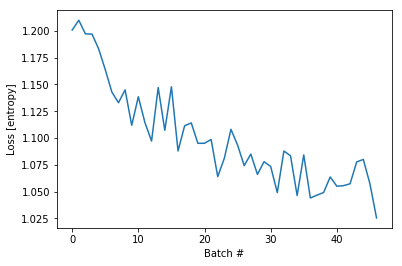

In [7]:
# Loss still pretty small. but Since this is the first time I shuffled, 
# the loss history looks really much more interesting.
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

In [8]:
print(minidata['x_train'].shape)
train_subset = np.random.choice(np.arange(0, minidata['x_train'].shape[0], 1),
                               10000, replace=False)
print('subset, ', len(train_subset))

# First make sure this random training subset covers all four classes.
Counter(np.argmax(minidata['y_train'][train_subset, :], axis=1))




(47689, 256, 1)
subset,  10000


Counter({3: 4095, 2: 2085, 1: 1637, 0: 2183})

In [9]:
%time y_pred_train = model(tf.convert_to_tensor(minidata['x_train'][train_subset], dtype=tf.float32))

CPU times: user 26.8 s, sys: 8.49 s, total: 35.3 s
Wall time: 11 s


In [10]:
# confusion... 
tf.confusion_matrix(
    np.argmax(minidata['y_train'][train_subset, :], axis=1),  # labels

    np.argmax(y_pred_train, axis=1), # predictions
    num_classes=4)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


<tf.Tensor: id=3973115, shape=(4, 4), dtype=int32, numpy=
array([[ 778,    0, 1405,    0],
       [ 168,  842,  627,    0],
       [   0,    0, 2085,    0],
       [ 219, 1618, 2258,    0]], dtype=int32)>